### Writing documentation, tests and testing for PR ###

In [1]:
%pylab inline
%cd Fatiando

Populating the interactive namespace from numpy and matplotlib
(bookmark:Fatiando) -> /home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects/fatiando


In [2]:
from fatiando.seismic import wavefd

### Ricker replaces MexHat source, Gauss also added  ###

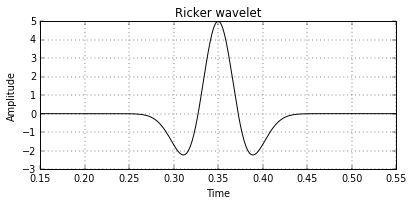

In [3]:
w = wavefd.Ricker(amp=5, cf=10, delay=3.5/10.)
w

Documentation from the base class copied by hand on the derived classes.

In [4]:
import numpy as np
shape = (150, 150)
velocity = 1500*np.ones(shape)
density = 2200*np.ones(shape)

In [5]:
sim = wavefd.ElasticSH(velocity, density, (5,5))                       
sim.add_point_source((shape[0]//2, shape[1]//2), wavefd.Ricker(5, 10.))

In [6]:
sim.run(300)

|##################################################|100% Ran 300 iterations in 3.87897 seconds.

In [7]:
sim[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

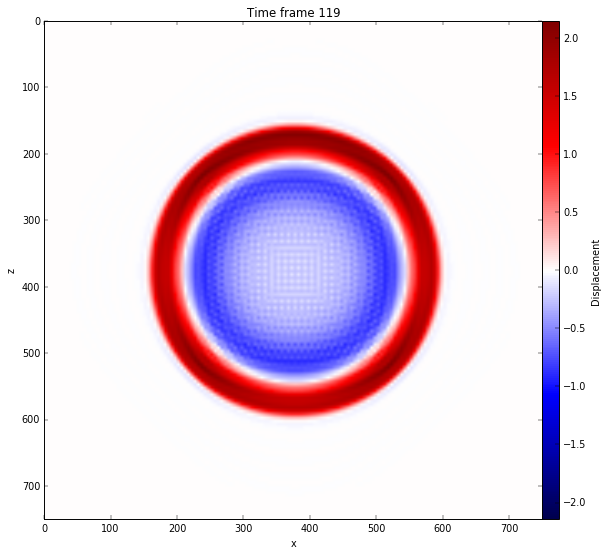

In [8]:
sim.explore()

In [12]:
#sim.animate(every=5, cutoff=1, blit=True, fps=20, dpi=50, embed=True)
sim.animate(1, embed=True, dpi=50, fps=10, cutoff=0.02, cmap='Greys')

In [ ]:
import numpy
from numpy.testing import assert_almost_equal

In [ ]:
assert_almost_equal(w(0), 0.0, decimal=3, err_msg="")

In [ ]:
fname = sim.cachefile
del sim
reloaded = wavefd.ElasticSH.from_cache(fname)

In [ ]:
reloaded

In [ ]:
reloaded.run(100)
reloaded

In [ ]:
reloaded.animate(embed=True, fps=10, dpi=50)

In [ ]:
reloaded.animate(every=5, cutoff=1, blit=True, fps=20, dpi=50, embed=True)

In [ ]:
shape = (50, 50)
pvel = 4000*np.ones(shape)
svel = 3000*np.ones(shape)
density = 2200*np.ones(shape)
sim = wavefd.ElasticPSV(pvel, svel, density, spacing=10)
sim.add_point_source((shape[0]//2, shape[1]//2), dip=45, source=wavefd.Ricker(5, 10, 1./10))
sim.cachefile
sim.run(180)

In [ ]:
sim

In [ ]:
sim.explore()

In [ ]:
# Set the parameters of the finite difference grid
shape = (200, 200)
ds = 100.  # spacing
area = [0, shape[0] * ds, 0, shape[1] * ds]
# Set the parameters of the finite difference grid
velocity = np.zeros(shape) + 6000.
velocity[100:, 100:] = 0.
fc = 15.
duration = 2.5
simulation = wavefd.Scalar(velocity, (ds, ds))
simulation.add_point_source((125, 75), wavefd.Gauss(1., fc))

In [ ]:
simulation.run(100)

In [ ]:
simulation.shape

In [ ]:
simulation.velocity.shape

In [ ]:
simulation.padding

In [ ]:
fig = figure(figsize=(52,5))
ax = fig.add_subplot(111)
fig.colorbar

In [ ]:
#simulation.u.shape

In [ ]:
fname = simulation.cachefile
del simulation
reloaded = wavefd.Scalar.from_cache(fname)

In [ ]:
reloaded.run(400)

In [ ]:
reloaded

In [ ]:
reloaded.animate(every=5, cutoff=0.05, blit=True, fps=20, dpi=50, embed=True)